<a href="https://colab.research.google.com/github/asdfasdf0311/2023DataminingStudy/blob/main/ydms_week2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YDMS 2주차 차원축소_PCA** - 주하연

In [ ]:
from google.colab import drive #구글 드라이브에 데이터를 저장해서 데이터를 불러왔다.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

데이터 불러오기

In [ ]:
dat = pd.read_csv('/content/drive/MyDrive/ydms/week2/BostonHousing.csv')

In [ ]:
dat = pd.DataFrame(dat)

In [ ]:
dat.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
dat.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


null값 확인

In [ ]:
dat.isna().sum() #null값이 없음을 볼 수 있다.

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

PCA하기 전 데이터를 표준화 시켜야 한다.

In [ ]:
from sklearn.preprocessing import StandardScaler

dat = StandardScaler().fit_transform(dat)

#pca.fit(scaled_data)
#pca_data = pca.transform(scaled_data)


In [ ]:
print(dat) #표준화된 데이터(평균이0, 분산이 1인 표준정규분포)

[[-0.41978194  0.28482986 -1.2879095  ...  0.44105193 -1.0755623
   0.15968566]
 [-0.41733926 -0.48772236 -0.59338101 ...  0.44105193 -0.49243937
  -0.10152429]
 [-0.41734159 -0.48772236 -0.59338101 ...  0.39642699 -1.2087274
   1.32424667]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  0.44105193 -0.98304761
   0.14880191]
 [-0.40776407 -0.48772236  0.11573841 ...  0.4032249  -0.86530163
  -0.0579893 ]
 [-0.41500016 -0.48772236  0.11573841 ...  0.44105193 -0.66905833
  -1.15724782]]


In [ ]:
from sklearn.decomposition import PCA #pca라이브러리

## **PCA** : 10개로 줄이기

In [ ]:
pca = PCA(n_components=10)
pca_array = pca.fit_transform(dat)
pca_df = pd.DataFrame(pca_array,
                      columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

pca_df #2차원으로 축소된 결과를 데이터프레임으로 나타냄

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.087344,0.492853,-0.335991,-0.028088,-1.012801,-0.262092,0.327878,0.160216,-0.471148,-0.205773
1,-1.373382,-0.170924,-0.965964,-0.432406,-0.254645,0.303779,0.559110,-0.288650,-0.195830,-0.246239
2,-2.376553,0.914027,-0.090026,-1.123913,0.032788,0.508900,0.487534,0.082490,0.054227,-0.195005
3,-2.837779,0.194870,0.060545,-1.065682,0.460334,0.714008,0.623329,0.239722,-0.358620,-0.155891
4,-2.772916,0.433299,0.064042,-1.129637,0.382179,0.655855,0.704497,-0.102626,-0.408753,-0.000421
...,...,...,...,...,...,...,...,...,...,...
501,-0.302820,0.142758,-1.044803,-1.145579,0.401054,0.575679,0.204804,-0.299996,0.856454,-0.192173
502,-0.043395,-0.115689,-1.390396,-0.981682,0.369944,0.446177,0.193942,-0.155380,0.859755,0.129961
503,-0.368190,0.823162,-0.933509,-1.571420,0.402072,0.598953,0.308241,-0.753437,0.952027,-0.195218
504,-0.264317,0.540016,-1.033267,-1.397118,0.374742,0.598664,0.284319,-0.688925,0.905981,-0.211203


In [ ]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0    0.467571
1    0.585394
2    0.681745
3    0.745069
4    0.805848
5    0.852991
6    0.891235
7    0.920026
8    0.939831
9    0.957849
dtype: float64

 고유값이 설명가능한 분산량이 95%에 해당하는 지점이 10번째 주성분 값이라는 것을 알 수 있다.
 = **10개의 주성분이 데이터 분포의 특징 중 약 96%를 설명**하고 있음을 알 수 있다.

 밑은 각 주성분이 얼만큼 데이터의 분포 중 몇 %를 설명하는지 그래프로 나타낸 것이다.

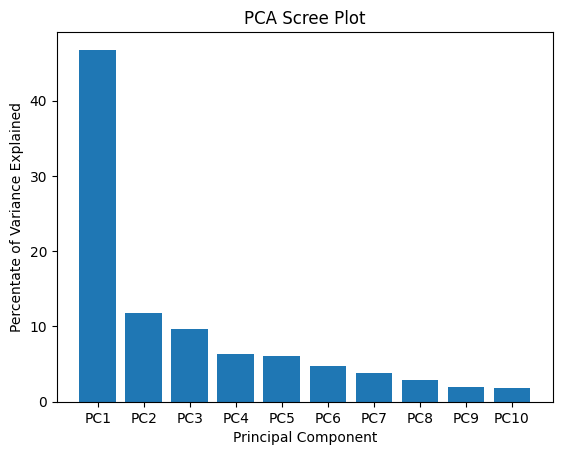

In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()